In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from time import time
from scipy.stats import ks_2samp
from scipy.stats import kstest
import pickle

# Question 1

# lambda = b * N = 0.4 * N

# Prob{T ≥ h} = exp(−bN h) 

# h = −(ln(P)/bN)


In [2]:
begin=time()
N0=1
STEP=300000
SIM=1000
np.random.seed(55)
s = np.zeros(( SIM , STEP))
H = np.zeros(( SIM , STEP))
N = np.zeros(( SIM , STEP))
N[:,0] = N0
for j in range( SIM ):
    for i in range(STEP-1):
        h = - np.log(np.random.rand())/(0.4*N[j,i])
        H[j,i]=h
        s[j,i+1] = s[j,i] + h
        N[j,i+1] = N[j,i] + 1

end=time()
print(end-begin)

1159.5801906585693


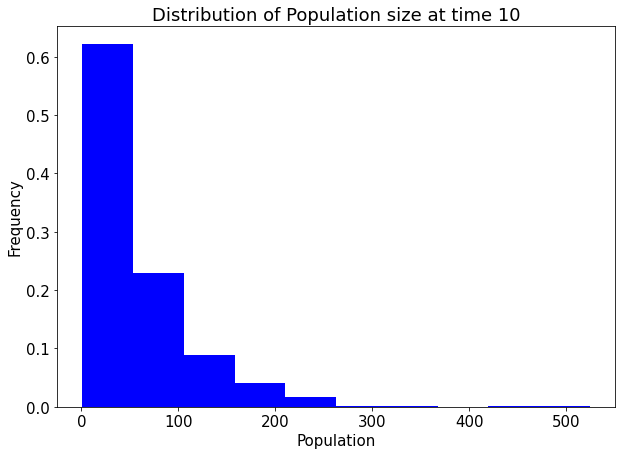

In [9]:
K=10
a=[]
for i in range(SIM):
    a.append(N[i,:][np.where([s[i,:]>K])[1][0] -1 ])
a=np.array(a)
# mybin=np.arange(np.min(a), np.max(a)+5, 5)
weights10 = np.zeros_like(a) + 1. / a.size
plt.hist(a,color='blue',weights=weights10) 
plt.yticks=np.linspace(0.1, 1, 10,endpoint=True)
plt.rcParams['figure.figsize'] = 10, 7
plt.title("Distribution of Population size at time "+str(K))
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.rcParams.update({'font.size': 15})
plt.savefig('Q1 For K'+str(K)+'.png')

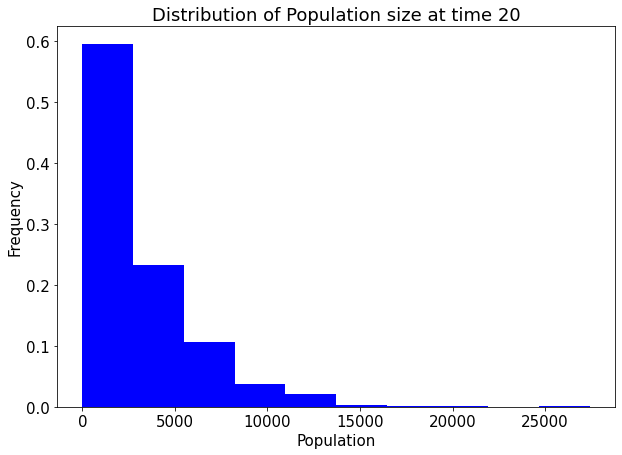

In [10]:
K=20
a=[]
for i in range(SIM):
    a.append(N[i,:][np.where([s[i,:]>K])[1][0] -1 ])
a=np.array(a)
# mybin=np.arange(np.min(a), np.max(a)+5, 5)
weights10 = np.zeros_like(a) + 1. / a.size
plt.hist(a,color='blue',weights=weights10) 
plt.yticks=np.linspace(0.1, 1, 10,endpoint=True)
plt.rcParams['figure.figsize'] = 10, 7
plt.title("Distribution of Population size at time "+str(K))
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.rcParams.update({'font.size': 15})
plt.savefig('Q1 For K'+str(K)+'.png')

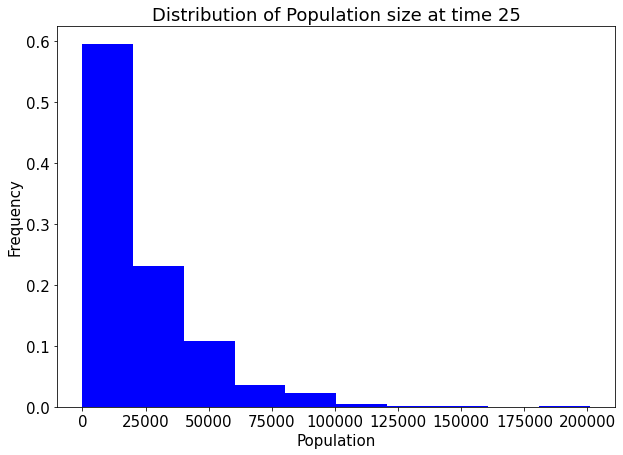

In [11]:
K=25
a=[]
for i in range(SIM):
    a.append(N[i,:][np.where([s[i,:]>K])[1][0] -1 ])
a=np.array(a)
# mybin=np.arange(np.min(a), np.max(a)+5, 5)
weights10 = np.zeros_like(a) + 1. / a.size
plt.hist(a,color='blue',weights=weights10) 
plt.yticks=np.linspace(0.1, 1, 10,endpoint=True)
plt.rcParams['figure.figsize'] = 10, 7
plt.title("Distribution of Population size at time "+str(K))
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.rcParams.update({'font.size': 15})
plt.savefig('Q1 For K'+str(K)+'.png')

# Comparing simulation result with deterministic solution

# pop = N0 * exp(b* t)

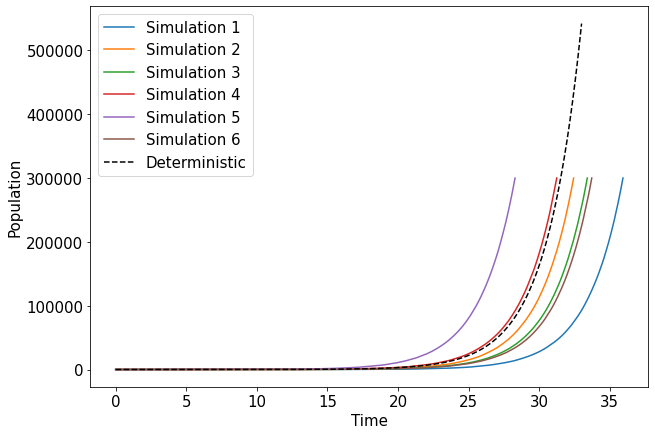

In [12]:
tmax = np.mean(s[:, -1])
t=np.linspace(0, tmax , 10*(int(np.max(N[:,-1]))))
yd = N0*np.exp(0.4*t)
for i in range(6):
    plt.plot(s[i,:], N[i,:],label="Simulation "+str(i+1))
plt.plot(t , yd , 'k--', label ="Deterministic")
plt.ylabel("Population")
plt.xlabel("Time")
plt.legend()
plt.savefig('Q1 - comparison .png')

# Question 2

# lambda = b * N + 2 * sin(t) = 0.4 * N + 2 * sin(t)

# Prob{T ≥ h} = exp((−bN+ 2* sin(t)) h) 

# h(t) = −(ln(P)/(bN+ 2* sin(t)))

In [2]:
begin=time()
N0=1
STEP=300000
SIM=1000
np.random.seed(5)
s2 = np.zeros(( SIM , STEP))
H2 = np.zeros(( SIM , STEP))
N2 = np.zeros(( SIM , STEP))
N2[:,0] = N0
for j in range( SIM ):
    for i in range(STEP-1):
        h = - np.log(np.random.rand())/((0.4*N2[j,i])+2*math.sin(s2[j,i]))
        H2[j,i]=h
        s2[j,i+1] = s2[j,i] + h
        N2[j,i+1] = N2[j,i] + 1
        
end=time()
print(end-begin)

1484.5355803966522


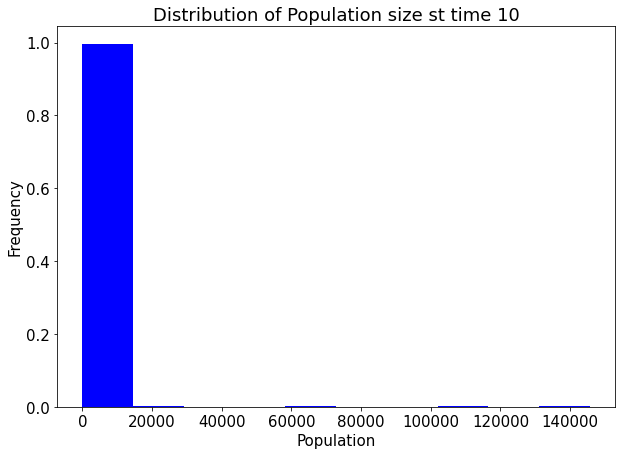

In [16]:
K=10
a=[]
for i in range(SIM):
    if len((np.where(s2[i,:]>K)[0])>0):
        a.append(N2[i,:][np.where(s2[i,:]>K)[0][0] -1 ])
a=np.array(a)
# mybin=np.arange(np.min(a), np.max(a)+5, 5)
weights10 = np.zeros_like(a) + 1. / a.size
plt.hist(a,color='blue',weights=weights10) 
plt.yticks=np.linspace(0.1, 1, 10,endpoint=True)
plt.rcParams['figure.figsize'] = 10, 7
plt.title("Distribution of Population size st time "+str(K))
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.rcParams.update({'font.size': 15})
plt.savefig('Q2 For K'+str(K)+'.png')

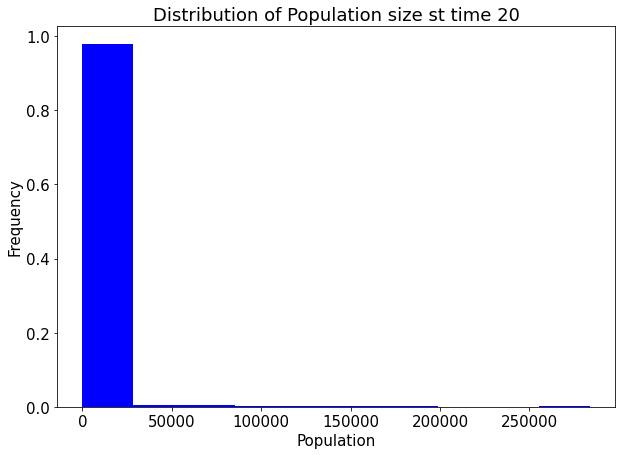

In [4]:
K=20
a=[]
for i in range(SIM):
    if len((np.where(s2[i,:]>K)[0])>0):
        a.append(N2[i,:][np.where(s2[i,:]>K)[0][0] -1 ])
a=np.array(a)
# mybin=np.arange(np.min(a), np.max(a)+5, 5)
weights10 = np.zeros_like(a) + 1. / a.size
plt.hist(a,color='blue',weights=weights10) 
plt.yticks=np.linspace(0.1, 1, 10,endpoint=True)
plt.rcParams['figure.figsize'] = 10, 7
plt.title("Distribution of Population size st time "+str(K))
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.rcParams.update({'font.size': 15})
plt.savefig('Q2 For K'+str(K)+'.png')

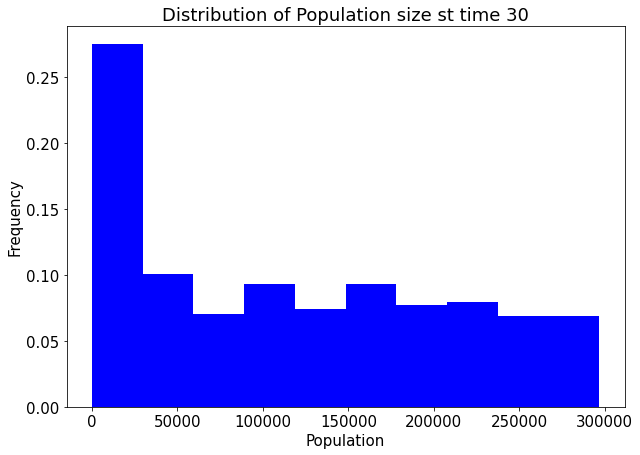

In [5]:
K=30
a=[]
for i in range(SIM):
    if len((np.where(s2[i,:]>K)[0])>0):
        a.append(N2[i,:][np.where(s2[i,:]>K)[0][0] -1 ])
a=np.array(a)
# mybin=np.arange(np.min(a), np.max(a)+5, 5)
weights10 = np.zeros_like(a) + 1. / a.size
plt.hist(a,color='blue',weights=weights10) 
plt.yticks=np.linspace(0.1, 1, 10,endpoint=True)
plt.rcParams['figure.figsize'] = 10, 7
plt.title("Distribution of Population size st time "+str(K))
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.rcParams.update({'font.size': 15})
plt.savefig('Q2 For K'+str(K)+'.png')

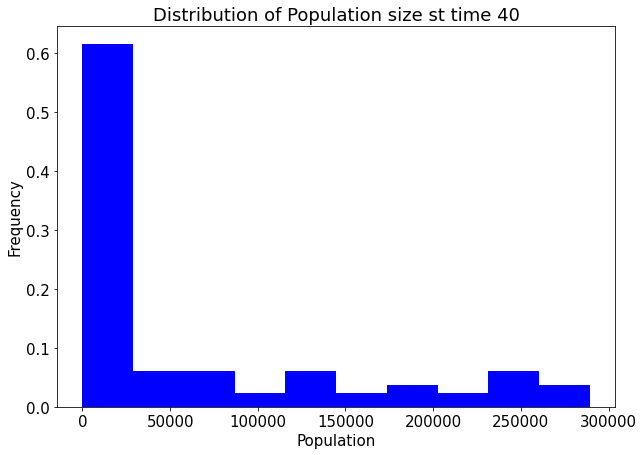

In [6]:
K=40
a=[]
for i in range(SIM):
    if len((np.where(s2[i,:]>K)[0])>0):
        a.append(N2[i,:][np.where(s2[i,:]>K)[0][0] -1 ])
a=np.array(a)
# mybin=np.arange(np.min(a), np.max(a)+5, 5)
weights10 = np.zeros_like(a) + 1. / a.size
plt.hist(a,color='blue',weights=weights10) 
plt.yticks=np.linspace(0.1, 1, 10,endpoint=True)
plt.rcParams['figure.figsize'] = 10, 7
plt.title("Distribution of Population size st time "+str(K))
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.rcParams.update({'font.size': 15})
plt.savefig('Q2 For K'+str(K)+'.png')

# Distribution of time increment

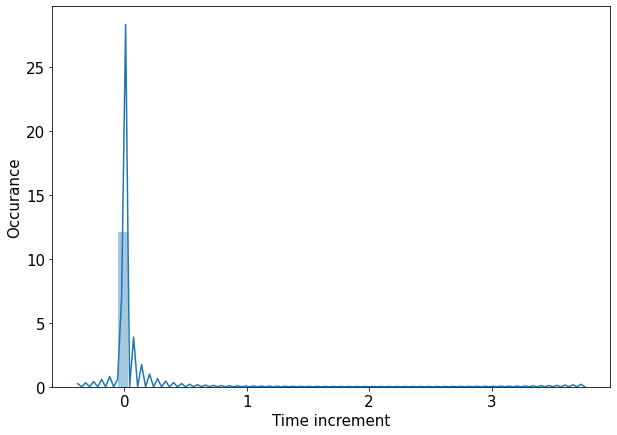

In [7]:
sns.distplot(H2[0,:])
plt.xlabel("Time increment")
plt.ylabel("Occurance")
plt.show()

In [37]:
S=np.random.exponential(scale=0.4,size=300000)

In [38]:
for i in range(10):
    D=H2[i,:]
    F=ks_2samp(S,D)[1]
    print("P-value of time increment distribution and exponential distribution is "+str(F))

P-value of time increment distribution and exponential distribution is 0.0
P-value of time increment distribution and exponential distribution is 0.0
P-value of time increment distribution and exponential distribution is 0.0
P-value of time increment distribution and exponential distribution is 0.0
P-value of time increment distribution and exponential distribution is 0.0
P-value of time increment distribution and exponential distribution is 0.0
P-value of time increment distribution and exponential distribution is 0.0
P-value of time increment distribution and exponential distribution is 0.0
P-value of time increment distribution and exponential distribution is 0.0
P-value of time increment distribution and exponential distribution is 0.0


# Reference
http://people.bu.edu/andasari/courses/stochasticmodeling/lecture4/Lecture4b_CTBD.pdf